In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Obesity Classification.csv')
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Label']=le.fit_transform(df['Label'])
df['Gender']=le.fit_transform(df['Gender'])
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1
...,...,...,...,...,...,...,...
103,106,11,1,175,10,3.9,3
104,107,16,0,160,10,3.9,3
105,108,21,1,180,15,5.6,3
106,109,26,0,150,15,5.6,3


In [4]:
x=df.iloc[:,0:7]
y=df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 7)
(33, 7)
(75,)
(33,)


In [7]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler().fit(x_train)
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [8]:
!pip install xgboost

In [9]:
#cretaing model
import xgboost
from xgboost import XGBClassifier

In [11]:
xgbt=XGBClassifier(max_depth=2,learning_rate=0.2,objective='multi:softmax',num_class=2,booster="gbtree",n_estimators=10,random_state=112)
model=xgbt.fit(x_train,y_train)
model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_class=2, num_parallel_tree=None,
              objective='multi:softmax', ...)

In [12]:
#predictions
y_pred=model.predict(x_test)

In [13]:
# accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7272727272727273


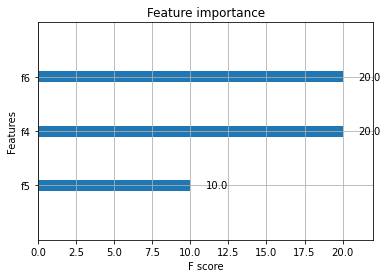

In [15]:
#plotting
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(xgbt);